In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm

# 데이터

## 실제 데이터

In [2]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

In [3]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

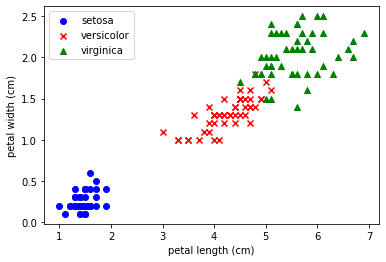

In [4]:
c_set = ['blue', 'red', 'green']
m_set = ['o', 'x', '^']
l_set = iris.target_names

for cnt in set(y_iris):
    X_pts = [X_iris[i, 2] for i in range(len(y_iris)) if y_iris[i] == cnt]
    y_pts = [X_iris[i, 3] for i in range(len(y_iris)) if y_iris[i] == cnt]
    plt.scatter(X_pts, y_pts, color=c_set[cnt],\
                marker=m_set[cnt], label=l_set[cnt])

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(loc='best')
plt.show()

In [5]:
X_iris_original = sm.add_constant(X_iris[:,2:4])
y_iris_original = (y_iris==2).astype(np.int)

In [6]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_iris_original, y_iris_original, test_size=0.2, random_state=2020)

In [7]:
iris_model = linear_model.LogisticRegression(solver='liblinear', fit_intercept=False).fit(X_train,y_train)

In [8]:
y_pred = iris_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test,y_pred)
report = metrics.classification_report(y_test,y_pred)

print(round(accuracy,3))
print(report)

0.833
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.81      0.82      0.82        30
weighted avg       0.84      0.83      0.84        30



In [9]:
iris_model.coef_

array([[-3.86943707, -0.07264319,  2.62505382]])

# 가상의 데이터

In [10]:
original_X, original_y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=2020)
X = sm.add_constant(original_X)
y = original_y

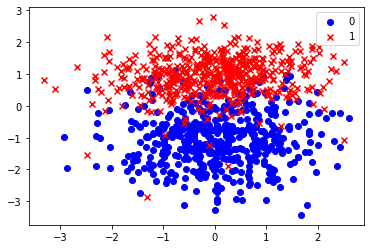

In [11]:
c_set = ['blue', 'red']
m_set = ['o', 'x']
l_set = ['0', '1']

for cnt in set(y):
    X_pts = [X[i, 1] for i in range(len(y)) if y[i] == cnt]
    y_pts = [X[i, 2] for i in range(len(y)) if y[i] == cnt]
    plt.scatter(X_pts, y_pts, color=c_set[cnt],marker=m_set[cnt], label=l_set[cnt])

plt.legend(loc='best')
plt.show()

In [12]:
model = linear_model.LogisticRegression(solver='liblinear', fit_intercept=False).fit(X,y)

In [13]:
model.coef_

array([[-0.28499978, -0.26016207,  3.11367369]])

# Newton-Rapshon Method (Gauss-Newton Method)

loglikelihood of Logistic (cost) :

\begin{align*}
\ell\left(\beta\right)
&=-\sum_{i=1}^{n}\left\{ y_{i}log\left(\sigma\left(\mathbf{x}_{i}^{T}\beta\right)\right)+\left(1-y_{i}\right)log\left(1-\sigma\left(\mathbf{x}_{i}^{T}\beta\right)\right)\right\} 
\end{align*}

Gradient :

\begin{align*}
\frac{\partial}{\partial\beta}\ell\left(\beta\right) & =-\sum_{i=1}^{n}\left\{ y_{i}\frac{\partial}{\partial\beta}\left(log\left(\sigma\left(\mathbf{x}_{i}^{T}\beta\right)\right)\right)+\left(1-y_{i}\right)\frac{\partial}{\partial\beta}\left(log\left(1-\sigma\left(\mathbf{x}_{i}^{T}\beta\right)\right)\right)\right\} \\
 &=X^{T}
 \left(\begin{array}{c}
\pi_{1}-y_{1}\\
\vdots\\
\pi_{n}-y_{n}
\end{array}\right)
\end{align*}

Hessian :

\begin{align*}
\frac{\partial^{2}}{\partial\beta^{T}\beta}\ell\left(\beta\right)
& =\frac{\partial}{\partial\beta^{T}} X^{T}
 \left(\begin{array}{c}\pi_{1}-y_{1}\\\vdots\\
\pi_{n}-y_{n}
\end{array}\right)\\
 & =X^{T} Diag\left(\pi_{1}\left(1-\pi_{1}\right),...,\pi_{n}\left(1-\pi_{n}\right)\right) X
\end{align*}

In [14]:
def loglikelihood_logisitc(X,y,beta):
    sigmoid = 1/(1+np.exp(-X@beta))
    logl = - sum(y*sigmoid+(1-y)*(1-sigmoid))
    return logl

def newton_logistic_iteration(X, y, beta, show_converge=False):
    temp_beta = beta
    temp_pi = 1/(1+np.exp(-X@temp_beta))
    temp_beta = temp_beta - np.linalg.inv(X.T@np.diag((temp_pi*(1-temp_pi)).reshape(-1))@X) @(X.T @ (temp_pi-y)) * 0.1
    if show_converge:
        converge_error = np.sqrt(np.sum((temp_beta-beta)**2))
        return temp_beta, converge_error
    else:
        return temp_beta

def newton_method(X, y, init_beta, converge=0.01):
    converge_error = converge+1
    iteration = 0
    temp_beta = init_beta
    loglikelihood = []
    while converge_error>converge:
        temp_beta, converge_error = newton_logistic_iteration(X, y, temp_beta, show_converge=True)
        loglikelihood.append(loglikelihood_logisitc(X,y,temp_beta))
        iteration +=1
    print(iteration,'iterations for converge.')
    return temp_beta, loglikelihood

## 가상 데이터 결과

In [15]:
temp_beta = np.random.random(3)
init_beta = temp_beta/sum(temp_beta)
beta, logl = newton_method(X, y, init_beta, converge=0.0001)

94 iterations for converge.


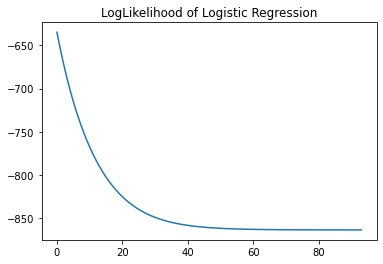

In [16]:
plt.plot(logl)
plt.title('LogLikelihood of Logistic Regression')
plt.show()

In [17]:
beta

array([-0.31396442, -0.27245252,  3.24217961])

In [18]:
# true
model.coef_

array([[-0.28499978, -0.26016207,  3.11367369]])

## 실제 데이터 결과

In [19]:
temp_beta = np.random.random(3)
init_beta = temp_beta/sum(temp_beta)
iris_beta, iris_logl = newton_method(X_train, y_train, init_beta, converge=0.0001)

176 iterations for converge.


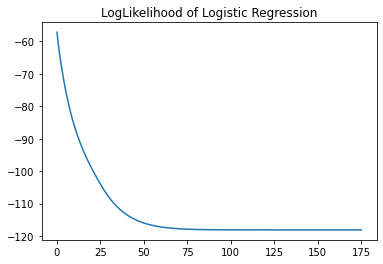

In [20]:
plt.plot(iris_logl)
plt.title('LogLikelihood of Logistic Regression')
plt.show()

In [21]:
iris_beta

array([-75.6910566 ,   9.2944335 ,  18.31882442])

In [22]:
# true
iris_model.coef_

array([[-3.86943707, -0.07264319,  2.62505382]])

In [23]:
y_pred = (1-1/(1+np.exp(X_test @ iris_beta))>0.5).astype(int)

pd.DataFrame([y_test, y_pred], index=['true','predict'])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
true,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
predict,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0


In [24]:
accuracy = metrics.accuracy_score(y_test,y_pred)
report = metrics.classification_report(y_test,y_pred)

print(round(accuracy,3))
print(report)

0.867
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.87      0.87      0.87        30



# 참고 자료

https://hgmin1159.github.io/convex/Subgradient-Method/

https://hgmin1159.github.io/convex/convex_review/

https://en.wikipedia.org/wiki/Newton%27s_method

https://freshrimpsushi.tistory.com/678

https://issactoast.com/111